# OBJECTIVES
Predicting future market trends based on historical data involves using various statistical and machine learning techniques. 

# Data Collection
Data collection was performed using the Python library yfinance, which allows access to historical stock prices, market indices, and company fundamentals from Yahoo Finance. The dataset includes key financial attributes such as Open, High, Low, Close, Adjusted Close, and Volume. The focus of the data is on the S&P 500 index, which consists of 500 leading publicly traded companies in the United States across diverse sectors like technology, healthcare, finance, and consumer goods.

The following Python code demonstrates how to fetch historical data for the S&P 500 index using yfinance:

python
pip install yfinance

import yfinance as yf

ticker = "^GSPC"  # S&P 500 index symbol
start_date = "2000-01-01"
end_date = "2025-02-10"

//Download historical data from Yahoo Finance<br>
df = yf.download(ticker, start=start_date, end=end_date)

//Display the first few rows of the dataset<br>
print(df.head())<br>

This snippet installs the yfinance package, imports it, defines the ticker symbol for the S&P 500, specifies the date range, downloads the data, and prints the initial rows for inspection.



# Importing of the libraries

In [177]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
import joblib 

# Importing the data from the cvc files

In [178]:
df = pd.read_csv("sp500_data.csv")
# Check column names
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'policy_change',
       'fedrete', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


# Cleaning and wrangling of data

In [179]:
# Strip whitespace from all column names
df.columns = df.columns.str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3774 non-null   object 
 1   Close          3774 non-null   float64
 2   High           3774 non-null   float64
 3   Low            3774 non-null   float64
 4   Open           3774 non-null   float64
 5   Volume         3774 non-null   int64  
 6   policy_change  3774 non-null   int64  
 7   fedrete        3774 non-null   float64
 8   Unnamed: 8     0 non-null      float64
 9   Unnamed: 9     0 non-null      float64
 10  Unnamed: 10    0 non-null      float64
dtypes: float64(8), int64(2), object(1)
memory usage: 324.5+ KB


# Missing Data Checking and Handling

This section deals with checking for missing values and handling them appropriately.

In [180]:
# Check for missing values
print(df.isnull().sum())


Date                0
Close               0
High                0
Low                 0
Open                0
Volume              0
policy_change       0
fedrete             0
Unnamed: 8       3774
Unnamed: 9       3774
Unnamed: 10      3774
dtype: int64


In [181]:
# Drop columns with all null values
df=df.dropna(axis=1, how='all')

# Datatype handling

In [182]:
# Check the data types of each column
print(df.dtypes)

Date              object
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
policy_change      int64
fedrete          float64
dtype: object


In [183]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
# Check the data types of each column
print(df.dtypes)

Date             datetime64[ns]
Close                   float64
High                    float64
Low                     float64
Open                    float64
Volume                    int64
policy_change             int64
fedrete                 float64
dtype: object


# Duplicate Data Checking and Handling

Here, we check for duplicate rows and either drop them or replace unique values appropriately.

In [184]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Data Summary

In [185]:
# Data Summary
print("Shape of the data:", df.shape)
print("\nData types and missing values:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

Shape of the data: (3774, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3774 non-null   datetime64[ns]
 1   Close          3774 non-null   float64       
 2   High           3774 non-null   float64       
 3   Low            3774 non-null   float64       
 4   Open           3774 non-null   float64       
 5   Volume         3774 non-null   int64         
 6   policy_change  3774 non-null   int64         
 7   fedrete        3774 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 236.0 KB

Data types and missing values:
 None

Summary Statistics:
                                 Date        Close         High          Low  \
count                           3774  3774.000000  3774.000000  3774.000000   
mean   2017-07-01 21:42:38.346582016  2728.274880  2742.224616  27

# Basic Exploratory Data Analysis (EDA)

Visualizing numeric and categorical features and performing basic statistical analysis.

In [186]:

# Data Summary
print("Shape of the data:", df.shape)
print("\nData types and missing values:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

Shape of the data: (3774, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3774 non-null   datetime64[ns]
 1   Close          3774 non-null   float64       
 2   High           3774 non-null   float64       
 3   Low            3774 non-null   float64       
 4   Open           3774 non-null   float64       
 5   Volume         3774 non-null   int64         
 6   policy_change  3774 non-null   int64         
 7   fedrete        3774 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 236.0 KB

Data types and missing values:
 None

Summary Statistics:
                                 Date        Close         High          Low  \
count                           3774  3774.000000  3774.000000  3774.000000   
mean   2017-07-01 21:42:38.346582016  2728.274880  2742.224616  27

# Histogram of features

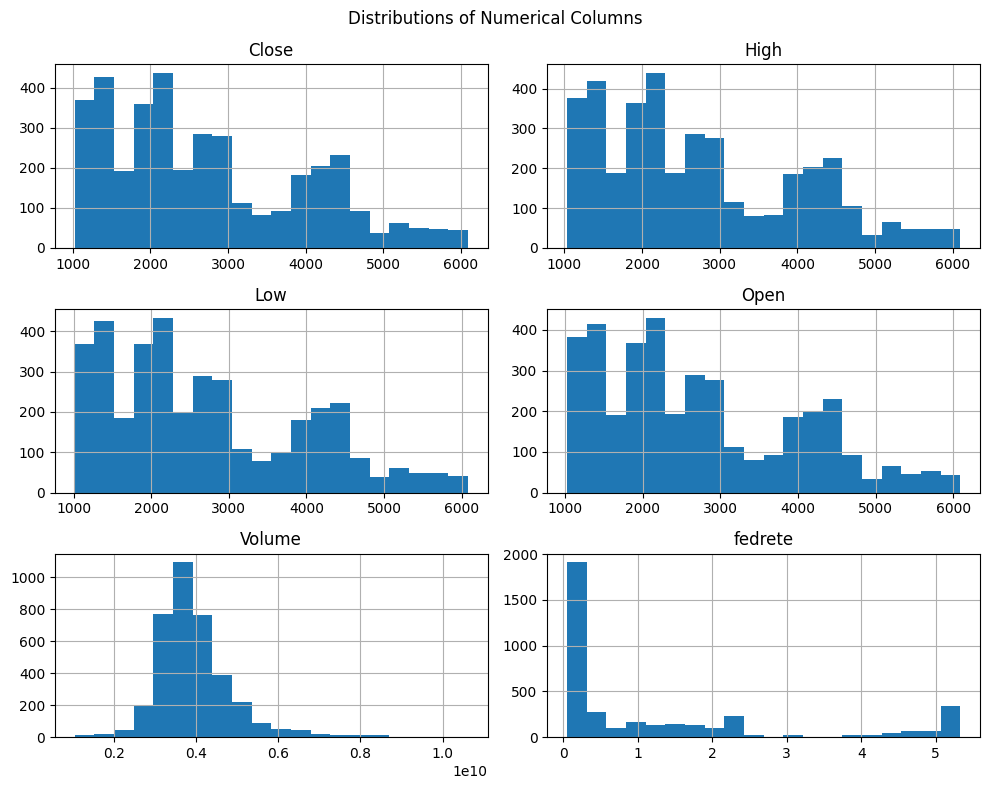

In [187]:
# Visualizing distributions for numerical columns
numerical_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'fedrete']
df[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions of Numerical Columns')
plt.tight_layout()
plt.show()


### Distribution of Numerical Columns

The histograms show the distribution of key numerical stock market variables:  

- **Close, High, Low, and Open Indexes**: These follow a multi-modal distribution, indicating multiple peaks, likely due to different market phases or stock splits.  
- **Volume**: Right-skewed, suggesting that most trading days have relatively lower volumes, with occasional spikes.  
- **Fed Rate**: Strongly right-skewed, with most values concentrated near zero, reflecting periods of low interest rates with occasional increases.  

This visualization helps identify trends, volatility, and potential outliers in the dataset.


# Time Series Plot

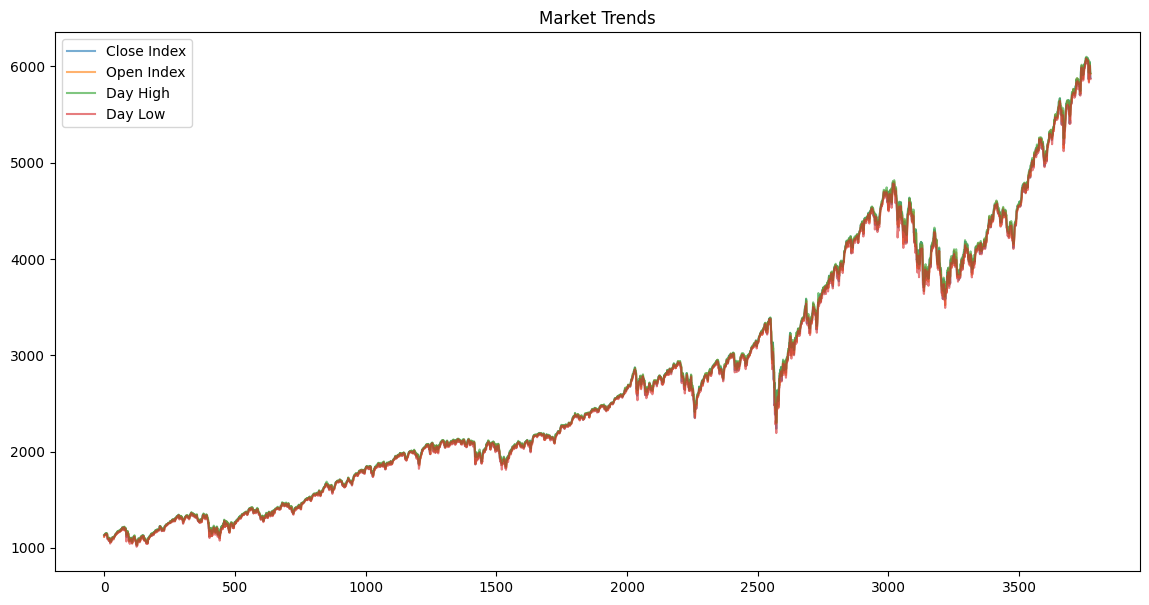

In [188]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Index', alpha=0.6)
plt.plot(df.index, df['Open'], label='Open Index', alpha=0.6)
plt.plot(df.index, df['High'], label='Day High', alpha=0.6)
plt.plot(df.index, df['Low'], label='Day Low', alpha=0.6)
plt.legend()
plt.title('Market Trends')
plt.show()

This chart, Market Trends with Moving Averages, illustrates the long-term price movement of the S&P 500, highlighting key price points such as Open, Close, High, and Low values. The chart shows a strong upward trend over time, with occasional sharp declines representing market corrections or economic downturns. The close alignment of these price points suggests a relatively stable market, except during volatile periods. Moving averages help smooth out short-term fluctuations, making it easier to identify broader trends and potential turning points in the market. Sharp declines or deviations from these moving averages can indicate significant shifts in market sentiment.

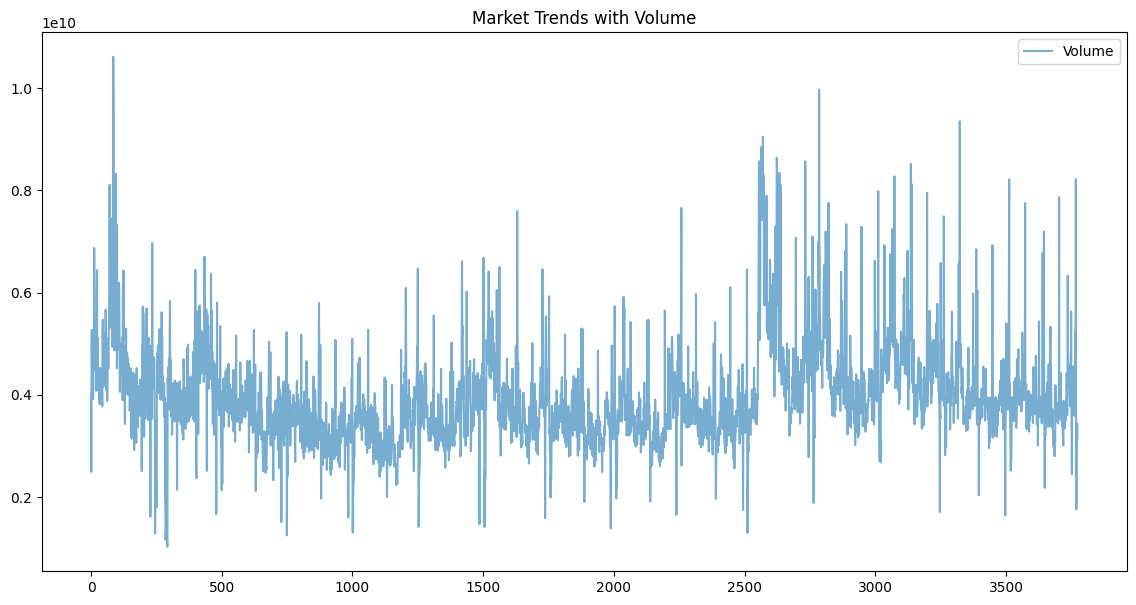

In [189]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume', alpha=0.6)
plt.legend()
plt.title('Market Trends with Volume')
plt.show()

The second chart, Market Trends with Volume, provides insights into market activity by displaying the volume of trades over time. The chart reveals significant spikes in volume at certain intervals, which typically correlate with major market movements. High trading volume often signals strong buying or selling pressure, indicating potential trend reversals or breakouts. Conversely, low volume may suggest weak momentum, making price trends less reliable. By analyzing volume in conjunction with insex trends, we can better confirm the strength of an ongoing trend and avoid false signals. Combining these insights with other technical indicators like RSI, MACD, or Bollinger Bands can further improve market trend predictions.

# Heatmap

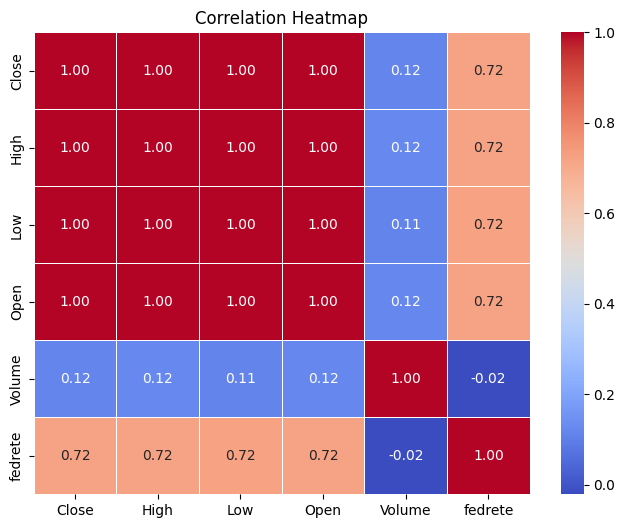

In [190]:
# Correlation heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- **Close, High, Low, and Open Prices**: Strongly correlated (**1.00**), indicating they move together in the same direction.  
- **Fed Rate & Indexes**: Moderate correlation (**~0.72**), suggesting interest rate changes impact stock indexes.  
- **Volume**: Weak correlation with stock indexes (**~0.12**), indicating trading volume does not strongly influence price movements.  
- **Fed Rate & Volume**: Very weak correlation (**-0.02**), showing little to no direct relationship.  

This heatmap helps understand how market factors interact, guiding feature selection for prediction models.

# Feature Engineering

Creating new features or transforming existing ones to improve model performance.

 1. Trend & Time Series Analysis 

In [191]:

# Rolling Averages
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

# 7-day rolling median
df['Rolling_Median_7'] = df['Close'].rolling(window=7).median()

# Volatility Analysis
df['Rolling Std (30-day)'] = df['Close'].rolling(window=30).std()

# Market Cycle Identification
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

# Time of Year and Week
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_of_Month'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Moving Average Crossovers (additional)
df['MA_7_50_diff'] = df['7-day MA'] - df['50-day MA']
df['MA_30_200_diff'] = df['30-day MA'] - df['200-day MA']

# Slope of Moving Averages
df['MA_7_slope'] = df['7-day MA'].diff()
df['MA_30_slope'] = df['30-day MA'].diff()



2. Market Sentiment & Shock Events

In [192]:
# Percentage Change
df['Pct Change'] = df['Close'].pct_change() * 100
df['Price_Change_Open_Close'] = df['Close'] - df['Open']
df['Pct_Change_Open_Close'] = df['Price_Change_Open_Close'] / df['Open'] * 100

# Detect Sudden Drops or Surges (Shock Events)
threshold = df['Pct Change'].std() * 2  # Extreme movements defined as 2 std devs away
df['Shock Event'] = (df['Pct Change'].abs() > threshold).astype(int)

3. Market Volatility & Stability

In [193]:
# Rolling Volatility Analysis
df['Rolling Volatility'] = df['Close'].rolling(window=30).std()
df['Rolling_Volatility_7'] = df['Close'].rolling(window=7).std()  
df['Rolling_Volatility_14'] = df['Close'].rolling(window=14).std()

# ATR (Average True Range)
df['ATR'] = df['High'] - df['Low']
df['ATR_14'] = df['ATR'].rolling(window=14).mean()

# Rolling Mean and Std of Close - Open
df['Close_Open_diff'] = df['Close'] - df['Open']
df['Rolling_Mean_Close_Open'] = df['Close_Open_diff'].rolling(window=30).mean()
df['Rolling_Std_Close_Open'] = df['Close_Open_diff'].rolling(window=30).std()



4. Market Performance Evaluation

In [194]:
# Cumulative Returns
df['Cumulative Returns'] = (1 + df['Pct Change'] / 100).cumprod()
df['Cumulative_Returns_7'] = df['Close'].pct_change(7).cumsum()  # 7-day cumulative returns

# Log Return
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Cumulative Return and Momentum
df['Cumulative_Return_100'] = (1 + df['Pct Change'] / 100).cumprod()
df['Price_Momentum_100'] = df['Close'].pct_change(100)  # 100-day momentum

# Price-to-Cumulative Return Ratio
df['Price_to_Cumulative_Returns'] = df['Close'] / df['Cumulative Returns']

5. Predictive Feature Engineering

In [195]:
# Lag Features
df['Close_lag_1'] = df['Close'].shift(1)
df['Close_lag_2'] = df['Close'].shift(2)
df['Close_lag_5'] = df['Close'].shift(5)
df['Close_lag_10'] = df['Close'].shift(10)
df['Open_lag_1'] = df['Open'].shift(1)
df['Open_lag_2'] = df['Open'].shift(2)
df['Open_lag_3'] = df['Open'].shift(3)
df['Open_lag_5'] = df['Open'].shift(5)
df['Open_lag_10'] = df['Open'].shift(10)

# Momentum
df['Price_Momentum_7'] = df['Close'].pct_change(7)  # 7-day momentum
df['Price_Momentum_30'] = df['Close'].pct_change(30)  # 30-day momentum

# Price Relative Strength Index (RSI)
def compute_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df, window=14)  # 14-day RSI

# Exponential Moving Average (EMA)
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()  # 7-day EMA
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()  # 30-day EMA

# Moving Averages
df['5-day MA'] = df['Close'].rolling(window=5).mean()
df['10-day MA'] = df['Close'].rolling(window=10).mean()

# Bollinger Bands
df['Bollinger_Upper'] = df['Close'].rolling(window=20).mean() + (2 * df['Close'].rolling(window=20).std())  # Upper band
df['Bollinger_Lower'] = df['Close'].rolling(window=20).mean() - (2 * df['Close'].rolling(window=20).std())  # Lower band

# Volume Indicators
df['Volume_MA_7'] = df['Volume'].rolling(window=7).mean()  # 7-day moving average of volume
df['Volume_Rate_of_Change'] = df['Volume'].pct_change()  # Volume rate of change
df['Volume_to_Open_Ratio'] = df['Volume'] / df['Open']

# Price-to-Moving-Average Ratio
df['Price_to_7MA'] = df['Close'] / df['7-day MA']
df['Price_to_30MA'] = df['Close'] / df['30-day MA']

# Volatility-to-Change Ratio
df['Volatility-to-Change'] = df['Rolling Std (30-day)'] / df['Pct Change'].abs()

# Open-Close Difference Momentum
df['Open_Close_Momentum_7'] = (df['Open'] - df['Close']).pct_change(7)  # 7-day momentum between Open and Close
df['Open_Close_Momentum_30'] = (df['Open'] - df['Close']).pct_change(30)  # 30-day momentum

# Open-Close Ratio
df['Open_to_Close_Ratio'] = df['Open'] / df['Close']
df['Close_to_Open_Ratio'] = df['Close'] / df['Open']

# Rolling Moving Averages on Open
df['Rolling_Open_MA_7'] = df['Open'].rolling(window=7).mean()
df['Rolling_Open_MA_30'] = df['Open'].rolling(window=30).mean()
df['Rolling_Open_MA_50'] = df['Open'].rolling(window=50).mean()

#  Additional Lag Features for Open
df['Open_lag_1'] = df['Open'].shift(1)
df['Open_lag_2'] = df['Open'].shift(2)
df['Open_lag_5'] = df['Open'].shift(5)



In [196]:
# Check for missing values
print(df.isnull().sum())

Date                    0
Close                   0
High                    0
Low                     0
Open                    0
                       ..
Open_to_Close_Ratio     0
Close_to_Open_Ratio     0
Rolling_Open_MA_7       6
Rolling_Open_MA_30     29
Rolling_Open_MA_50     49
Length: 71, dtype: int64


In [197]:
# Define columns to fill (those with missing values)
columns_to_fill = [
    '7-day MA', '30-day MA', 'Rolling_Median_7', 'Rolling Std (30-day)', '50-day MA',
    '200-day MA', 'MA_7_50_diff', 'MA_30_200_diff', 'MA_7_slope', 'MA_30_slope', 
    'Pct Change', 'Rolling Volatility', 'Rolling_Volatility_7', 'Rolling_Volatility_14', 
    'ATR_14', 'Rolling_Mean_Close_Open', 'Rolling_Std_Close_Open', 'Cumulative Returns', 
    'Cumulative_Returns_7', 'Log_Return', 'Cumulative_Return_100', 'Price_Momentum_100', 
    'Price_to_Cumulative_Returns', 'Close_lag_1', 'Close_lag_2', 'Close_lag_5', 'Close_lag_10', 
    'Open_lag_1', 'Open_lag_2', 'Open_lag_3', 'Open_lag_5', 'Open_lag_10', 'Price_Momentum_7', 
    'Price_Momentum_30', 'RSI', '5-day MA', '10-day MA', 'Bollinger_Upper', 'Bollinger_Lower', 
    'Volume_MA_7', 'Volume_Rate_of_Change', 'Price_to_7MA', 'Price_to_30MA', 'Volatility-to-Change', 
    'Open_Close_Momentum_7', 'Open_Close_Momentum_30', 'Rolling_Open_MA_7', 'Rolling_Open_MA_30', 
    'Rolling_Open_MA_50'
]

# Get the median for the columns as an array
medians = df[columns_to_fill].median().to_numpy()

# Loop over each column and replace NaN values with the corresponding median
for i, column in enumerate(columns_to_fill):
    df[column] = df[column].fillna(medians[i])


Take date as index

In [198]:
# Load Data 
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Skrewness handling

In [199]:
print("Skewness before transformation:")
skewness_before = df.skew()
print(skewness_before)


Skewness before transformation:
Close                  0.659144
High                   0.657179
Low                    0.661324
Open                   0.659340
Volume                 1.550263
                         ...   
Open_to_Close_Ratio    0.548665
Close_to_Open_Ratio   -0.359262
Rolling_Open_MA_7      0.657296
Rolling_Open_MA_30     0.647362
Rolling_Open_MA_50     0.638657
Length: 70, dtype: float64


c:\Users\me\Desktop\Mortem\Projects\Python\Personal_projects\.venv\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [200]:
# Apply log1p transformation only to highly skewed features
columns_to_log_transform = skewness_before[skewness_before > 1].index.tolist()
print(f"Applying log1p to: {columns_to_log_transform}")

df[columns_to_log_transform] = df[columns_to_log_transform].apply(np.log1p)

#Apply log transformation to relevant columns to reduce skewness
columns_to_log_transform = ['Volume', 'Close', 'High', 'Low', 'Pct Change']
for col in columns_to_log_transform:
    df[col] = np.log1p(df[col])  # np.log1p is used for log(1 + x) to handle 0 values


Applying log1p to: ['Volume', 'policy_change', 'fedrete', 'Rolling Std (30-day)', 'Shock Event', 'Rolling Volatility', 'Rolling_Volatility_7', 'Rolling_Volatility_14', 'ATR', 'ATR_14', 'Rolling_Std_Close_Open', 'Volume_MA_7', 'Volume_Rate_of_Change', 'Volume_to_Open_Ratio']


c:\Users\me\Desktop\Mortem\Projects\Python\Personal_projects\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Outlier Handling (Numeric Features Only)

Identifying and handling outliers using boxplots and other statistical methods.

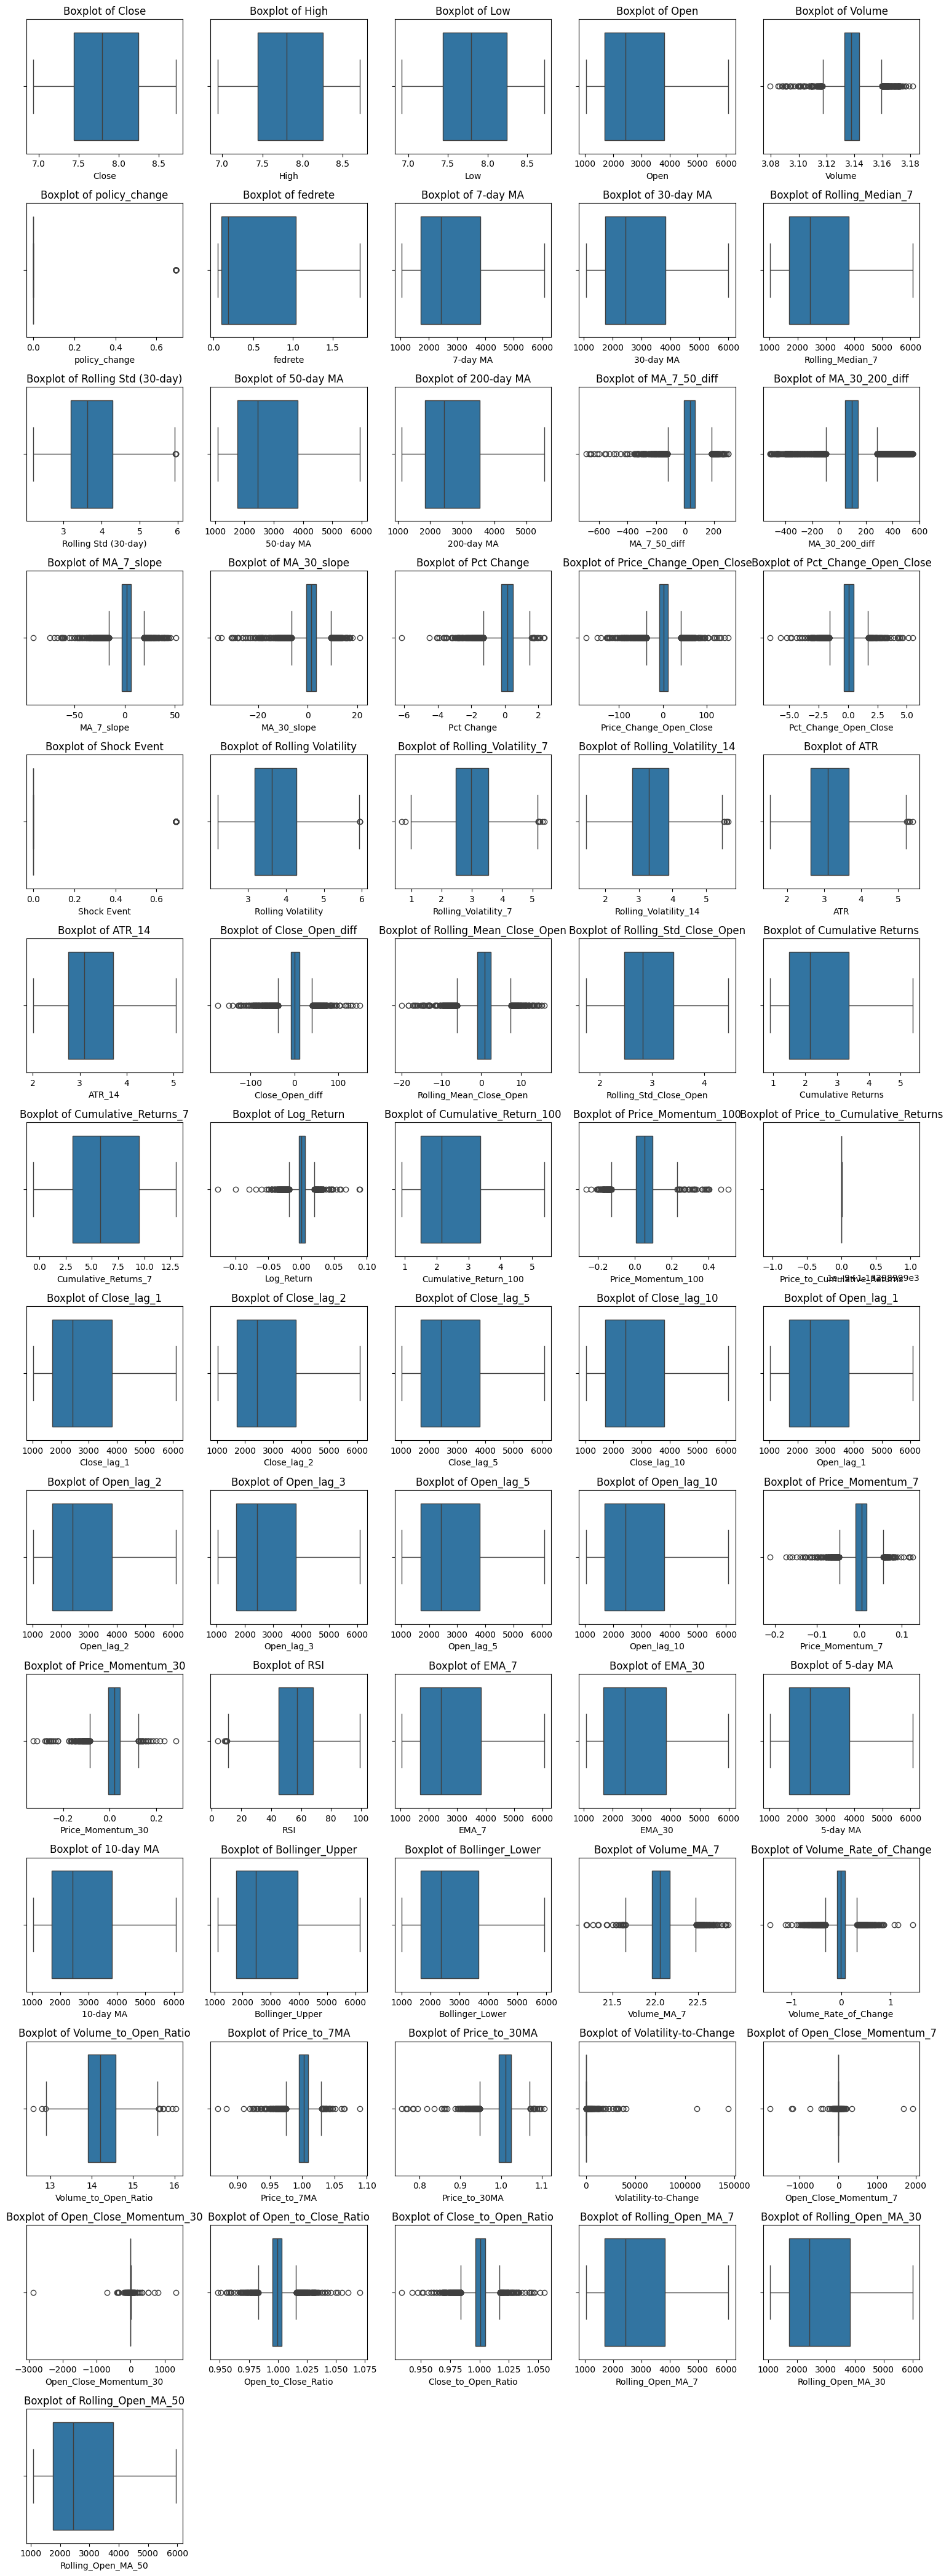

In [201]:
# Create a boxplot to visualize outliers
# Select all numeric columns (both int64 and float64)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of subplots dynamically
num_cols = len(numeric_columns)
num_rows = (num_cols // 5) + (num_cols % 5 > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))  # Adjust figure size
axes = axes.flatten()  # Flatten to easily iterate

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Volatility and Market Trends** 

Volatility indicators like **Rolling Volatility (7, 14)** and **ATR** measure price fluctuations. **High volatility** signals uncertainty and potential trend reversals, while **low volatility** suggests stability. Traders use these metrics to **gauge risk** and anticipate **breakouts or consolidations**.  

**Momentum and Trend Strength** 

Momentum indicators, such as **Price Momentum (7, 30, 100)** and **RSI**, help identify **trend direction and strength**. **Rising momentum** suggests strong buying pressure, while **declining momentum** indicates potential selling. **RSI** highlights **overbought (above 70)** and **oversold (below 30)** conditions, helping traders **predict reversals**.  

**Moving Averages and Trend Confirmation**  

The slopes of moving averages (**MA_7_slope, MA_30_slope**) indicate **trend strength**. **Positive slopes** confirm **uptrends**, while **negative slopes** suggest **downtrends**. Moving average crossovers, like **MA_30_200_diff**, signal potential **trend shifts**, with a **Golden Cross** indicating **bullish momentum** and a **Death Cross** suggesting **bearish movement**.  

**Volume and Market Activity**  

Volume indicators, such as **Volume Rate of Change** and **Volume MA (7)**, measure **trading activity**. **High volume** confirms strong trends, while **declining volume** suggests weakening momentum. The **Volume to Open Ratio** helps assess **early market sentiment** and **liquidity**.  

**Shock Events and Market Reactions** 
 
**Shock event indicators** capture **sudden market movements** caused by **economic events or news**. These events lead to **sharp volatility spikes**, influencing **short-term price direction** and **trading strategies**.  


In [202]:

# Calculate IQR (Interquartile Range) for outlier capping
columns_to_check = ['Volume', 'Close', 'High', 'Low', 'Pct Change', 'Rolling Std (30-day)', 'Cumulative Returns']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping: values below lower bound are set to lower bound, values above upper bound are set to upper bound
df[columns_to_check] = np.where(df[columns_to_check] < lower_bound, lower_bound, df[columns_to_check])
df[columns_to_check] = np.where(df[columns_to_check] > upper_bound, upper_bound, df[columns_to_check])

# Step 3: Verify transformations and capping
print("Transformed and Capped Data (Head):")
print(df[columns_to_check].head())


Transformed and Capped Data (Head):
              Volume     Close      High       Low  Pct Change  \
Date                                                             
2010-01-04  3.140153  7.033498  7.034273  7.018903    0.065432   
2010-01-05  3.119540  7.036606  7.036702  7.030557    0.271223   
2010-01-06  3.149621  7.037151  7.038950  7.034344    0.053116   
2010-01-07  3.152113  7.041140  7.041814  7.032024    0.336558   
2010-01-08  3.144260  7.044015  7.044373  7.036342    0.253225   

            Rolling Std (30-day)  Cumulative Returns  
Date                                                  
2010-01-04              3.630023            2.146939  
2010-01-05              3.630023            1.003116  
2010-01-06              3.630023            1.003663  
2010-01-07              3.630023            1.007679  
2010-01-08              3.630023            1.010583  


# Feature Reduction

Using correlation analysis and PCA to reduce the dimensionality of the dataset.

In [203]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the correlation threshold
threshold = 0.90

# Find the columns that are highly correlated with each other
high_corr_var = set()

# Loop through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Add the feature with high correlation to the set
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

# Drop the highly correlated features from the original dataset
df = df.drop(columns=high_corr_var)

# Display the remaining features
print("Remaining Features after removing highly correlated ones:")
print(df.columns)


Remaining Features after removing highly correlated ones:
Index(['Close', 'Volume', 'policy_change', 'fedrete', 'Rolling Std (30-day)',
       'Day_of_Week', 'Day_of_Month', 'Month', 'MA_7_50_diff',
       'MA_30_200_diff', 'MA_7_slope', 'Pct Change', 'Price_Change_Open_Close',
       'Shock Event', 'Rolling_Volatility_7', 'Rolling_Volatility_14', 'ATR',
       'ATR_14', 'Rolling_Mean_Close_Open', 'Price_Momentum_100', 'RSI',
       'Volume_MA_7', 'Volume_Rate_of_Change', 'Volume_to_Open_Ratio',
       'Price_to_7MA', 'Price_to_30MA', 'Volatility-to-Change',
       'Open_Close_Momentum_7', 'Open_Close_Momentum_30'],
      dtype='object')


# Scaling

Scaling or normalization [Numeric features only]

In [204]:
# Selecting only numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Handling Infinite and Large Values
numeric_features.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
numeric_features.dropna(inplace=True)  # Drop rows with NaN values

# Initialize the scaler 
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_features = scaler.fit_transform(numeric_features)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)


Save the weight for demo purposes.

In [205]:
# Save the scaler weights for demo purposes
with open("scaler_weights.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaling/Normalization completed and weights saved.")

Scaling/Normalization completed and weights saved.


Normality test by analyzing skew after scaling or normalization

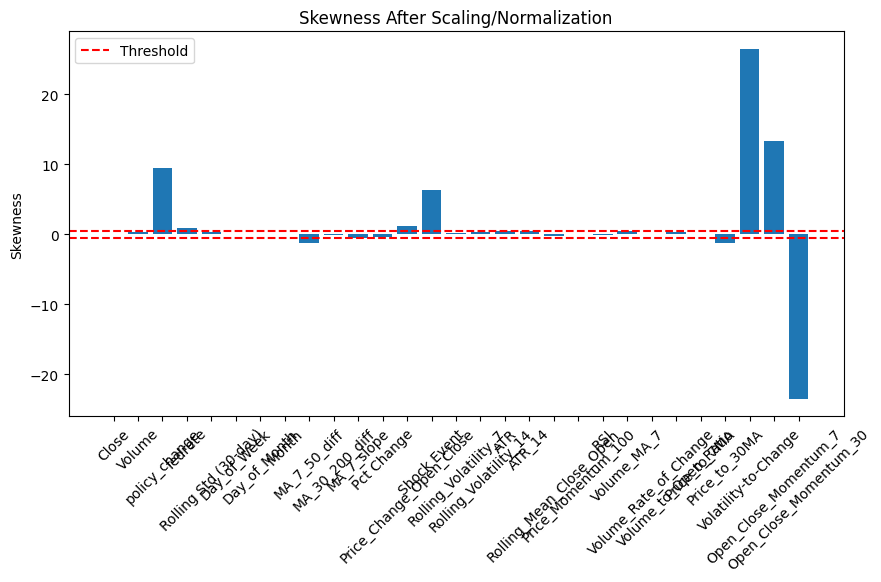

Log1p transformation applied to highly skewed features: ['policy_change', 'fedrete', 'MA_7_50_diff', 'Price_Change_Open_Close', 'Shock Event', 'Price_to_30MA', 'Volatility-to-Change', 'Open_Close_Momentum_7', 'Open_Close_Momentum_30']


c:\Users\me\Desktop\Mortem\Projects\Python\Personal_projects\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\me\Desktop\Mortem\Projects\Python\Personal_projects\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


In [206]:
# Normality test by analyzing skewness after scaling
skewness_after = scaled_df.skew()

# Visualizing skewness
plt.figure(figsize=(10, 5))
plt.bar(skewness_after.index, skewness_after.values)
plt.axhline(y=0.5, color='r', linestyle='--', label="Threshold")
plt.axhline(y=-0.5, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness After Scaling/Normalization")
plt.legend()
plt.show()

# If any feature is highly skewed, apply log1p transformation
highly_skewed_features = skewness_after[abs(skewness_after) > 0.9].index
df[highly_skewed_features] = np.log1p(df[highly_skewed_features])

print("Log1p transformation applied to highly skewed features:", list(highly_skewed_features))


# Model Training

In [207]:
# Define target
df['Target'] = np.where(df['Pct Change'] > 0, 1, 0)
target_column = "Target"

# 29 selected features
selected_features = [
    "Close", "Volume", "policy_change", "fedrete", "Rolling Std (30-day)",
    "Day_of_Week", "Day_of_Month", "Month", "MA_7_50_diff",
    "MA_30_200_diff", "MA_7_slope", "Price_Change_Open_Close", "Shock Event",
    "Rolling_Volatility_7", "Rolling_Volatility_14", "ATR", "ATR_14",
    "Rolling_Mean_Close_Open", "Price_Momentum_100", "RSI", "Volume_MA_7",
    "Volume_Rate_of_Change", "Volume_to_Open_Ratio", "Price_to_7MA",
    "Price_to_30MA", "Volatility-to-Change", "Open_Close_Momentum_7", "Open_Close_Momentum_30"
]

# Split features and target
X = df[selected_features]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle NaN & inf
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 29 features (no poly): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(model, 'logistic_model_29_features.pkl')
joblib.dump(scaler, 'scaler_29_features.pkl')


Accuracy with 29 features (no poly): 0.7444

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       344
           1       0.78      0.74      0.76       411

    accuracy                           0.74       755
   macro avg       0.74      0.74      0.74       755
weighted avg       0.75      0.74      0.74       755



['scaler_29_features.pkl']

The logistic regression model trained using only 29 selected features achieved an accuracy of 74.4% on the test set. The model performed fairly evenly across both target classes, indicating a balanced ability to distinguish between bullish and bearish market movements.The model slightly favors the bull class (1) in terms of precision but maintains balanced recall for both classes.

The macro and weighted F1-scores are identical, which confirms that the model performs comparably across both classes without major bias.

While slightly lower in accuracy compared to the polynomial-feature model, this version is simpler, more interpretable, and computationally efficient — making it well-suited for deployment or real-time applications.

# Implement the best model

In [208]:
#  Train Logistic Regression Model
best_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model.fit(X_train, y_train)

# Make Predictions
y_pred_best = best_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Logistic Regression Accuracy without Polynomial Features: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Optimized Logistic Regression Accuracy without Polynomial Features: 0.6808

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.58      0.63       344
           1       0.69      0.76      0.72       411

    accuracy                           0.68       755
   macro avg       0.68      0.67      0.67       755
weighted avg       0.68      0.68      0.68       755



The optimized logistic regression model achieves an accuracy of 68.08%, indicating that it correctly classifies market trends in approximately 68 out of 100 cases. This performance reflects a reasonable capability to differentiate between positive ("bull") and negative ("bear") market trends, though with room for improvement compared to models with interaction terms.

The model performs better on "bull" trends (Class 1), with:<br>
Precision: 69% – when predicting a bull trend, it is correct 69% of the time.<br>
Recall: 76% – it detects most actual bull trends.<br>
F1-Score: 72% – balanced trade-off between precision and recall.<br>

Bear trends (Class 0) are less accurately predicted:<br>
Precision: 67% – lower confidence in bear predictions.<br>
Recall: 58% – the model misses a notable portion of bear trends.<br>
F1-Score: 63% – comparatively weaker performance.<br>

The macro average shows performance is not fully balanced between the two classes, and the model could benefit from improved feature engineering or more representative data.

# Save the trained model for future use

In [209]:
with open("linear_classification_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model training complete. Model saved as 'linear_classification_model.pkl'.")

Model training complete. Model saved as 'linear_classification_model.pkl'.


# Model demo

Step 1: Load Original Input Data

In [210]:

input_df = pd.DataFrame({
    "Date": ["2025-02-22"],  # Example date
    "Close": [4500.25],  
    "High": [4520.50],  
    "Low": [4480.75],  
    "Open": [4495.00],  
    "Volume": [1000000],  
    "policy_change": [1],  # Assuming binary (1 for change, 0 for no change)
    "fedrate": [5.25]  # Corrected column name
})

input_df["Date"] = pd.to_datetime(input_df["Date"])
df = input_df.copy()  # Now it's clean and correct



Step 2: Feature Engineering (Ensure Consistency with Training)

In [ ]:
df = input_df.copy()  # Work on a copy to maintain integrity
# Convert 'Date' to datetime format
input_df["Date"] = pd.to_datetime(input_df["Date"])
input_df["Day_of_Week"] = input_df["Date"].dt.dayofweek
input_df["Day_of_Month"] = input_df["Date"].dt.day
input_df["Month"] = input_df["Date"].dt.month

# Step 2: Feature Engineering (Only Keep Selected Features)
df = input_df.copy()

# **Market Volatility & Trends**
df['Rolling Std (30-day)'] = df['Close'].rolling(window=30).std()
df['ATR'] = df['High'] - df['Low']
df['ATR_14'] = df['ATR'].rolling(window=14).mean()

# **Momentum Indicators**
df['Price_Momentum_100'] = df['Close'].pct_change(100)

# **Moving Averages & Differences**
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

df['MA_7_50_diff'] = df['MA_7'] - df['MA_50']
df['MA_30_200_diff'] = df['MA_30'] - df['MA_200']

# **Slope of MA (Trend Indicator)**
df['MA_7_slope'] = df['MA_7'].diff()

# **Price & Volume Change Metrics**
df['Pct Change'] = df['Close'].pct_change()
df['Price_Change_Open_Close'] = df['Close'] - df['Open']
df['Rolling_Mean_Close_Open'] = df[['Close', 'Open']].mean(axis=1)

# **Rolling Volatility**
df['Rolling_Volatility_7'] = df['Close'].rolling(window=7).std()
df['Rolling_Volatility_14'] = df['Close'].rolling(window=14).std()

# **RSI Calculation**
def compute_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df, window=14)

# **Volume Indicators**
df['Volume_MA_7'] = df['Volume'].rolling(window=7).mean()
df['Volume_Rate_of_Change'] = df['Volume'].pct_change()

# **Ratios**
df['Volume_to_Open_Ratio'] = df['Volume'] / df['Open']
df['Price_to_7MA'] = df['Close'] / df['MA_7']
df['Price_to_30MA'] = df['Close'] / df['MA_30']
df['Volatility-to-Change'] = df['Rolling Std (30-day)'] / df['Pct Change']

# **Momentum-Based Open-Close Features**
df['Open_Close_Momentum_7'] = df['Price_Change_Open_Close'].rolling(window=7).mean()
df['Open_Close_Momentum_30'] = df['Price_Change_Open_Close'].rolling(window=30).mean()

# **Shock Event (Binary Indicator for Large Price Change)**
df['Shock Event'] = (df['Pct Change'].abs() > df['Rolling Std (30-day)']).astype(int)


# Ensure all required features exist (fill missing values due to rolling calculations)
df.fillna(method='bfill', inplace=True)

C:\Users\me\AppData\Local\Temp\ipykernel_9300\3514435337.py:70: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Step 3: Load Scaler & Apply Scaling/Normalization

In [213]:
import joblib

# Load Scaler
joblib.dump(scaler, 'scaler_29_features.pkl')


# Selected Features (from training)
selected_features = [
    "Close", "Volume", "policy_change", "fedrete", "Rolling Std (30-day)",
    "Day_of_Week", "Day_of_Month", "Month", "MA_7_50_diff",
    "MA_30_200_diff", "MA_7_slope", "Price_Change_Open_Close", "Shock Event",
    "Rolling_Volatility_7", "Rolling_Volatility_14", "ATR", "ATR_14",
    "Rolling_Mean_Close_Open", "Price_Momentum_100", "RSI", "Volume_MA_7",
    "Volume_Rate_of_Change", "Volume_to_Open_Ratio", "Price_to_7MA",
    "Price_to_30MA", "Volatility-to-Change", "Open_Close_Momentum_7", "Open_Close_Momentum_30"
]

# Ensure all required columns exist
for col in selected_features:
    if col not in df.columns:
        df[col] = 0  # Add missing column with default value (or use df.mean()[col] if preferable)

# Select columns in the correct order
df = df[selected_features]

# Handle missing values before scaling
df.fillna(df.mean(), inplace=True)

# Scale the data
scaled_features = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=selected_features)

print("Scaled Data (Excluding Date):\n", scaled_df)


Scaled Data (Excluding Date):
          Close        Volume  policy_change   fedrete  Rolling Std (30-day)  \
0  9592.036901  1.169809e+08      19.073035 -1.132391                   NaN   

   Day_of_Week  Day_of_Month   Month  MA_7_50_diff  MA_30_200_diff  ...  \
0     2.193076      0.724409 -1.3442           NaN             NaN  ...   

   Price_Momentum_100  RSI  Volume_MA_7  Volume_Rate_of_Change  \
0                 NaN  NaN          NaN                    NaN   

   Volume_to_Open_Ratio  Price_to_7MA  Price_to_30MA  Volatility-to-Change  \
0            417.750604           NaN            NaN                   NaN   

   Open_Close_Momentum_7  Open_Close_Momentum_30  
0                    NaN                     NaN  

[1 rows x 28 columns]


C:\Users\me\AppData\Local\Temp\ipykernel_9300\1650976299.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


Step 4: Load the Trained Model & Make Predictions

In [214]:
# Load model to check the number of features it expects
print(f"Model expects {best_model.n_features_in_} features.")

final_input = scaled_df[selected_features].iloc[-1:].fillna(0).values
print(f"Prediction input has {final_input.shape[1]} features.")


Model expects 28 features.
Prediction input has 28 features.


In [215]:
# Step 1: Convert final_input to a Pandas DataFrame (if not already)
if isinstance(final_input, np.ndarray):
    final_input = pd.DataFrame(final_input)

# Step 2: Handle NaN values
final_input = final_input.fillna(0).values  # Replace NaNs with 0

# Step 3: Ensure correct number of features
final_input = scaled_df[selected_features].iloc[-1:].fillna(0).values  # Use full 30 features

# Step 2: Check for NaNs
if np.isnan(final_input).any():
    raise ValueError("NaN values still present in final_input!")

# Step 3: Make Prediction
prediction = best_model.predict(final_input)

# Step 4: Interpret the Result
market_trend = "Bullish 🐂" if prediction[0] == 1 else "Bearish 🐻"
print(f"Predicted Market Trend: {market_trend} ({prediction[0]})")


Predicted Market Trend: Bearish 🐻 (0)


c:\Users\me\Desktop\Mortem\Projects\Python\Personal_projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Analysis of Market Prediction Based on Input Data**

## **Input Data Overview**
The input data represents key market conditions for **February 22, 2025**, including the stock market **index levels** at open, high, low, and close, as well as **trading volume, policy changes, and the Federal Reserve interest rate**. Below is a summary of the provided input values:

- **Opening Index Level**: 4,495.00  
- **Closing Index Level**: 4,500.25  
- **Highest Index Level**: 4,520.50  
- **Lowest Index Level**: 4,480.75  
- **Trading Volume**: 1,000,000 (shares traded)  
- **Policy Change**: 1 (Indicating a policy shift)  
- **Federal Reserve Interest Rate**: 5.25%  

A **policy change (1)** suggests that new economic or financial policies have been introduced, which could impact investor sentiment. Additionally, a **high interest rate (5.25%)** can lead to tighter financial conditions, affecting overall market performance.

## **Predicted Market Trend**
Based on this data, the model has predicted a **bearish market trend (0) 🐻**, indicating an expectation of a **decline in the market index**.

### **Interpretation of Bearish Market Trend**
A **bearish prediction** suggests that the market may experience a downturn, characterized by **falling index levels, increased volatility, and potential investor pessimism**. Several factors could contribute to this outlook:

- **Impact of High Interest Rates**:  
  A **5.25% Fed rate** may increase borrowing costs, reducing corporate investments and consumer spending, which can lead to a decline in the stock market index.  

- **Effect of Policy Changes**:  
  Policy shifts can introduce uncertainty, causing investors to **adopt a risk-averse stance** until the long-term effects become clearer.  

- **Trading Volume and Market Sentiment**:  
  A high **trading volume of 1,000,000 shares** combined with relatively small movements in the index suggests that market participants are actively reacting to economic conditions. Large sell-offs could further confirm a bearish sentiment.  

### **Implications of a Bearish Market**
A bearish trend may lead to **increased market volatility**, prompting investors to adjust their portfolios by:  

- Shifting focus to **defensive assets** (e.g., bonds, gold, or dividend-paying stocks).  
- Utilizing **risk management strategies**, such as hedging or portfolio diversification.  
- Monitoring key **technical indicators** (e.g., RSI, moving averages) to confirm the trend.  

## **Conclusion**
While the model predicts a bearish market, it is essential to **analyze additional economic factors and market indicators** for a comprehensive outlook. **Inflation rates, corporate earnings reports, and geopolitical events** can significantly influence future market movements.